<h1> Global Variables & Paths <h1>

In [1]:
# --------------------------------------------------------- Global Variables & Paths
# region
# @title Global Variables & Paths { display-mode: "form" }
import psutil
print(f"RAM usage at the start of the notebook is: {psutil.virtual_memory().used/1e9} GB")
import os

# --------------- vscode
VS_CODE_RAW_DATA_SET_PATH = r"C:\Users\Dell\Desktop\Bachelor\datasets\26 letters\2500\2500 balanced" # modify per data set
VS_CODE_CLEAN_DATA_SET_PATH = '../image_classification/data/clean_data'

# --------------- kaggle
KAGGLE_RAW_DATA_SET_PATH = '/kaggle/input/clean-2500-letters-only' # put (dataset name immediately after /input), and any extra folders modify per data set
KAGGLE_CLEAN_DATA_SET_PATH = '/kaggle/working/clean_data'


# --------------- colab
KAGGLE_CRED_PATH = '/content/gdrive/MyDrive/Bachelor/kaggle'
KAGGLE_DATA_SET_NAME = 'mahmoudreda55/arabic-letters-numbers-ocr'  # username/dataset name..t modify per data set
COLAB_RAW_DATA_SET_PATH = '/content/kaggle_data/Dataset' # put (dataset_name) after (kaggle_data) , then put any extra folders... modify the part after (kaggle_data) per data set
COLAB_CLAEN_DATA_SET_PATH = '/content/clean_data'

# ----------------- global variables
EPOCHS = 100
DATA_PERCENTAGE_TO_USE = 100
image_size = 64
USE_RAW_DATA = True
RENAME_CLEAN_DATA = False
# ----------------- for clustering
CLUSTERS_COUNT = 5
CLUSTERS_IMAGES_DEST = os.path.join(os.getcwd(), 'clusters_images')
ESTIMATE_OPTIMAL_NO_OF_CLUSTERS = False

print("img size: ", image_size)
print('Global Variables & Paths are set successfully.')
# endregion

RAM usage at the start of the notebook is: 0.61820928 GB
img size:  64
Global Variables & Paths are set successfully.


<h1> time calculation function <h1>

In [2]:
# --------------------------------------------------------- time calculation function
# region
# @title time calculation function { display-mode: "form" }


import time

global_start_time = time.time() # to calculate time taken for the whole notebook to run
def calculate_and_print_time(start_time , section_name):
    end_time = time.time()
    time_taken = end_time - start_time
    hours = int(time_taken // 3600)
    minutes = int((time_taken % 3600) // 60)
    seconds = int((time_taken % 3600) % 60)
    print(f'\n{section_name} done in : {hours} h, {minutes} m, {seconds} s')

print('time calculation function is set successfully.')

time calculation function is set successfully.


<h1> install libraries <h1>

In [3]:
# --------------------------------------------------------- install libraries
# region
# @title install libraries { display-mode: "form" }



start_time = time.time()

import pkg_resources
REQUIRED_PACKAGES = ['seaborn', 'tensorflow','natsort',"psutil","pympler"]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        %pip install {package} 
# uninstall the standalone keras package to force using the one installed with tensorflow
# %pip uninstall keras -y


calculate_and_print_time(start_time, 'installing required packages')
# print("installing required packages done")
# endregion

/tmp/ipykernel_24/2794974364.py:9: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


seaborn (0.12.2) is installed
tensorflow (2.15.0) is installed
natsort is NOT installed
Note: you may need to restart the kernel to use updated packages.
psutil (5.9.3) is installed
pympler (1.0.1) is installed

installing required packages done in : 0 h, 0 m, 13 s


<h1> imports <h1>

In [4]:
# --------------------------------------------------------- imports
# region
# @title imports { display-mode: "form" }
start_time = time.time()

import uuid
import time
import json
import random
import warnings
import shutil
import zipfile
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.preprocessing import image
from sklearn.cluster import MiniBatchKMeans
import psutil
from pympler import asizeof
import gc
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import io
import contextlib


calculate_and_print_time(start_time, 'imports')
# print("imports done")

# endregion



2024-05-08 18:48:21.815269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 18:48:21.815376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 18:48:21.941685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



imports done in : 0 h, 0 m, 13 s


<h1> detect Hardware <h1>

In [5]:
# --------------------------------------------------------- detect Hardware
# region
# @title detect Hardware {display-mode: "form"}
start_time = time.time()

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
    print('TPU details: ', tpu.cluster_spec().as_dict())
except ValueError:
    tpu = None
    strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if(gpus):
        print("Running on ", len(gpus), " GPU(s) ")
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        strategy = tf.distribute.MirroredStrategy(devices=["GPU:{}".format(i) for i in range(len(gpus))])
    else:        
        print("Running on CPU")

print("REPLICAS: ", strategy.num_replicas_in_sync)
calculate_and_print_time(start_time,'detecting hardware')
# extra
# endregion

Running on  1  GPU(s) 
REPLICAS:  1

detecting hardware done in : 0 h, 0 m, 0 s


<h1> functions <h1>

In [6]:
# --------------------------------------------------------- functions
# region
# @title functions {display-mode: "form"}


import dis


start_time = time.time()

raw_data_path = None
clean_data_path = None

def save_clusters_images_paths(data):
    clusters_summary = {}
    clusters_images_paths = {}
    for cluster in sorted(data['cluster'].unique()):
        cluster_key = f'cluster{int(cluster)}'
        cluster_data = data[data['cluster'] == cluster]
        cluster_classes = cluster_data['label'].unique().tolist()

        clusters_summary[cluster_key] = {
            'num_classes': len(cluster_classes),
            'classes': cluster_classes,
        }
        clusters_images_paths[cluster_key] = cluster_data['filename'].tolist()

    json_data = json.dumps({'clusters_summary': clusters_summary,'clusters_images_paths': clusters_images_paths},ensure_ascii=False,indent=4)
    created_json_file_name = f'clusters_info_dataset-perc{DATA_PERCENTAGE_TO_USE}_clusters{CLUSTERS_COUNT}'
    dest_path = os.path.join(os.getcwd(), f'{created_json_file_name}.json')
    with open(dest_path, 'w',encoding='utf-8') as f:
        f.write(json_data)

def display_entities_distribution_in_each_cluster(data, sort_plot=False):
    crosstab = pd.crosstab(data['cluster'], data['label'])
    for cluster_index in crosstab.index:
        cluster_data = crosstab.loc[cluster_index]
        if sort_plot:
            cluster_data = cluster_data.sort_values(ascending=False)
        ax = cluster_data.plot(kind='bar', color='blue', figsize=(15, 10), width=0.7)  # Increase figure size and decrease bar width
        title_text = f'{"sorted " if sort_plot else " "}classes distribution in cluster {cluster_index} which has a total of : {sum(cluster_data)} images'
        title_text += f'\n Note: numbers above the bars are percentages of the entity images to the size of the cluster'
        plt.title(title_text, fontsize=14)
        plt.xlabel('class')
        plt.ylabel('images count')

        cluster_size = sum(cluster_data)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/cluster_size)
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 0.1
            ax.annotate(percentage, (x, y), size = 10, ha='center')
        plt.show()
def visualize_clusters(data):
    crosstab = pd.crosstab(data['cluster'], data['label'])

    # Calculate the total number of images in each cluster
    total_images_per_cluster = crosstab.sum(axis=1)

    # pie chart ----------------------------------------
    plt.figure(figsize=(10, 7))
    chart_lables = ['Cluster ' + str(i) for i in total_images_per_cluster.index]
    plt.pie(total_images_per_cluster.values, labels=chart_lables, autopct='%1.1f%%')
    plt.title(f'Clusters sizes distribution \n Dataset size: {len(data)} images', fontsize=14)    
    plt.show()
    # --------------------------------------------------
    # For each cluster, plot a histogram of the count of every entity
    display_entities_distribution_in_each_cluster(data)
    display_entities_distribution_in_each_cluster(data,sort_plot=True)


# Function to transform an image into a feature vector
def image_to_feature_vector(img_path,model):
    img = image.load_img(img_path, target_size=(224, 224)) # 224 x 224 is the size of images that VGG16 previously trained on
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.reshape(-1)


def delete_from_RAM(variable_names):
    print_current_ram_usage(f"before deleting : {variable_names}")
    for var_name in variable_names:
        if var_name in globals():
            var_size_in_GB = asizeof.asizeof(globals()[var_name]) / 1e9
            print(f"variable {var_name} with size {var_size_in_GB} GB is in globals , and will be deleted")
            del globals()[var_name]
        elif var_name in locals():
            var_size_in_GB = asizeof.asizeof(locals()[var_name]) / 1e9
            print(f"variable {var_name} with size {var_size_in_GB} GB is in locals , and will be deleted")
        print()
    gc.collect()
    print(f"Deleted {variable_names} from RAM")
    print_current_ram_usage(f"after deleting : {variable_names}")


def print_current_ram_usage(message = ""):
    print(f"RAM usage {message}: {psutil.virtual_memory().used / 1e9} GB")
def get_environment():
    if 'COLAB_GPU' in os.environ:
        return 'Google Colab'
    elif 'KAGGLE_URL_BASE' in os.environ:
        return 'Kaggle'
    elif 'VSCODE_PID' in os.environ:
        return 'VS Code'
    else:
        return 'Unknown environment'

def do_colab_staff():

    from google.colab import drive
    drive.mount('/content/gdrive')

    # storing kaggle credentials
    os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_CRED_PATH

    !kaggle datasets download -d {KAGGLE_DATA_SET_NAME}
    print("downloaded dataset" ,KAGGLE_DATA_SET_NAME )
    
    
    ! mkdir kaggle_data
    downloaded_zip_name = f"{KAGGLE_DATA_SET_NAME.split('/')[-1]}.zip" # the !kaggle datasets download command will download the zip file with the same name as the dataset name
    extract_folder_path = 'kaggle_data'
    extract_zip(downloaded_zip_name, extract_folder_path)

    global raw_data_path
    raw_data_path = COLAB_RAW_DATA_SET_PATH
    global clean_data_path
    clean_data_path = COLAB_CLAEN_DATA_SET_PATH


def do_kaggle_staff():
    global raw_data_path
    raw_data_path = KAGGLE_RAW_DATA_SET_PATH
    global clean_data_path
    clean_data_path = KAGGLE_CLEAN_DATA_SET_PATH
    
def do_vscode_staff():
    global raw_data_path
    raw_data_path = VS_CODE_RAW_DATA_SET_PATH
    global clean_data_path
    clean_data_path = VS_CODE_CLEAN_DATA_SET_PATH

def do_unknown_environment_staff():
    print("This is an unknown environment, please enter the path to the data set folder:")
    global raw_data_path
    raw_data_path = input()     

def image_is_ok(image_path):
    with warnings.catch_warnings(record=True) as w:
        try:
            img = Image.open(image_path)
            img.verify()
            if len(w) > 0:  # if any warnings were issued
                return False
            return True
        except (IOError, SyntaxError):
            return False

def copy_clean_files(dirty_dataset_path, destination_folder_path):
    print("copying clean files...")
    # If the destination directory already exists, remove it and all its contents
    if os.path.exists(destination_folder_path):
        print(f"removing {destination_folder_path} directory to create a new one...")
        shutil.rmtree(destination_folder_path)
        print(f"removed {destination_folder_path} directory to create a new one...")
    os.makedirs(destination_folder_path)
    
    # Get the total number of files for the progress bar
    total_files = sum([len(files) for r, d, files in os.walk(dirty_dataset_path)])
    
    progress_bar = tqdm(total=total_files, desc="Copying files", unit="file")
    
    for root, dirs, files in os.walk(dirty_dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            if image_is_ok(file_path):
                new_file_path = os.path.join(destination_folder_path, os.path.relpath(file_path, dirty_dataset_path))
                os.makedirs(os.path.dirname(new_file_path) , exist_ok=True)
                shutil.copyfile(file_path, new_file_path)
            else:
                print(f"file: {os.path.relpath(file_path, dirty_dataset_path)} is corrupted & skipped from dataset while copying ")
            
            progress_bar.update(1)
    
    progress_bar.close()
    print(f"copied files from {dirty_dataset_path} to {destination_folder_path} successfully") 

def rename_files(data_set_path):
    all_entities_names = natsorted(os.listdir(data_set_path))
    print("giving temporary unique names...")
    for entity_name in all_entities_names:
        entity_path = os.path.join(data_set_path, entity_name)
        for filename in os.listdir(entity_path):
            temp_filename = str(uuid.uuid4()) + ".jpg"  # generate a unique filename
            source = os.path.join(entity_path, filename)
            destination = os.path.join(entity_path, temp_filename)
            os.rename(source, destination)
    # ----------------------------------------------------------------------------------------------------
    print("renaming...")
    # then rename every file in every folder in the given path

    for entity_name in all_entities_names:
        entity_path = os.path.join(data_set_path, entity_name)
        i = 1
        for filename in os.listdir(entity_path):
            entity_name = os.fsdecode(entity_name.lower())
            new_filename = entity_name + '.' + str(i) + ".jpg"
            source = os.path.join(entity_path, filename)
            destination = os.path.join(entity_path, new_filename)
            os.rename(source, destination)
            i += 1
    print("done renaming !")


def extract_zip(source_path, destination_path):
    # delete the destination folder if it exists
    if os.path.exists(destination_path):
        print('Deleting the existing destination folder...')
        shutil.rmtree(destination_path)

    print("Extracting files...") 
    with zipfile.ZipFile(source_path, 'r') as zip_ref:
        files = zip_ref.infolist()
        for file in tqdm(files, desc="Extracting files", unit="file"):
            try:
                file.filename = file.filename.encode('cp437').decode('utf-8')  # try 'cp437' encoding first
            except UnicodeDecodeError:
                file.filename = file.filename.encode('utf-8').decode('utf-8')  # fallback to 'utf-8' if 'cp437' fails
            zip_ref.extract(file, path=destination_path)

    print("Extraction complete.")


calculate_and_print_time(start_time, 'functions')
# print("functions done")
# endregion

    


functions done in : 0 h, 0 m, 0 s


<h1> doing specific-environment things <h1>

In [7]:
# --------------------------------------------------------- doing specific-environment things
# region
# @title doing specific-environment things {display-mode: "form"}
start_time = time.time()

# test if the tpu & GPU is available

raw_data_path = None    
environment_type = get_environment() 
print(f'Environment: {environment_type}')     

print("tensowflow version:", tf.__version__)
if environment_type == 'Google Colab':
    do_colab_staff()
elif environment_type == 'Kaggle':
    do_kaggle_staff()
elif environment_type == 'VS Code':
    do_vscode_staff()
else:
    do_unknown_environment_staff()

print("raw data set path:", raw_data_path)
assert os.path.exists(raw_data_path), ' wrong path for data set !' 
print("clean data set path:", clean_data_path)
  
calculate_and_print_time(start_time, 'doing specific-environment things')
print_current_ram_usage()

# endregion

        


Environment: Kaggle
tensowflow version: 2.15.0
raw data set path: /kaggle/input/clean-2500-letters-only
clean data set path: /kaggle/working/clean_data

doing specific-environment things done in : 0 h, 0 m, 0 s
RAM usage : 1.075585024 GB


<h1> data preparation <h1>

In [8]:
# --------------------------------------------------------- data preparation
# region
# @title data preparation {display-mode: "form"}
start_time = time.time()

print("raw data path:", raw_data_path)
if USE_RAW_DATA:
    ready_data_path = raw_data_path
    print("we will use raw data directly")
else :
    copy_clean_files(raw_data_path, clean_data_path)
    if RENAME_CLEAN_DATA:
        rename_files(clean_data_path)
    ready_data_path = clean_data_path        

# ----------------------------

print("we will use ", DATA_PERCENTAGE_TO_USE, "% of the data")
calculate_and_print_time(start_time, 'data preparation')
print_current_ram_usage()

# endregion
        


raw data path: /kaggle/input/clean-2500-letters-only
we will use raw data directly
we will use  100 % of the data

data preparation done in : 0 h, 0 m, 0 s
RAM usage : 1.075412992 GB


<h1 > 1 - Loading Images in a Dataframe <h1>

all entities names: ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
loading (أ) images in the dataframe
extracting features from (أ) images...


2024-05-08 18:48:36.221745: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.42855, expected 3.64542
2024-05-08 18:48:36.221797: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.87036, expected 5.08723
2024-05-08 18:48:36.221806: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.04003, expected 5.2569
2024-05-08 18:48:36.221814: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.22034, expected 5.43722
2024-05-08 18:48:36.221821: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.90026, expected 4.11714
2024-05-08 18:48:36.221829: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.21068, expected 4.42756
2024-05-08 18:48:36.221836: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.92061, expected 5.13748
2024-05-08 18:48:36.221853: E external/local_xla/xla/ser

loading (ب) images in the dataframe
extracting features from (ب) images...
loading (ت) images in the dataframe
extracting features from (ت) images...
loading (ث) images in the dataframe
extracting features from (ث) images...
loading (ج) images in the dataframe
extracting features from (ج) images...
loading (ح) images in the dataframe
extracting features from (ح) images...
loading (خ) images in the dataframe
extracting features from (خ) images...
loading (د) images in the dataframe
extracting features from (د) images...
loading (ذ) images in the dataframe
extracting features from (ذ) images...
loading (ر) images in the dataframe
extracting features from (ر) images...
loading (ز) images in the dataframe
extracting features from (ز) images...
loading (س) images in the dataframe
extracting features from (س) images...
loading (ش) images in the dataframe
extracting features from (ش) images...
loading (ص) images in the dataframe
extracting features from (ص) images...
loading (ض) images in the

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RAM usage before deleting : ['all_feature_vectors']: 16.056475648 GB
variable all_feature_vectors with size 13.942505616 GB is in globals , and will be deleted

Deleted ['all_feature_vectors'] from RAM
RAM usage after deleting : ['all_feature_vectors']: 2.108514304 GB


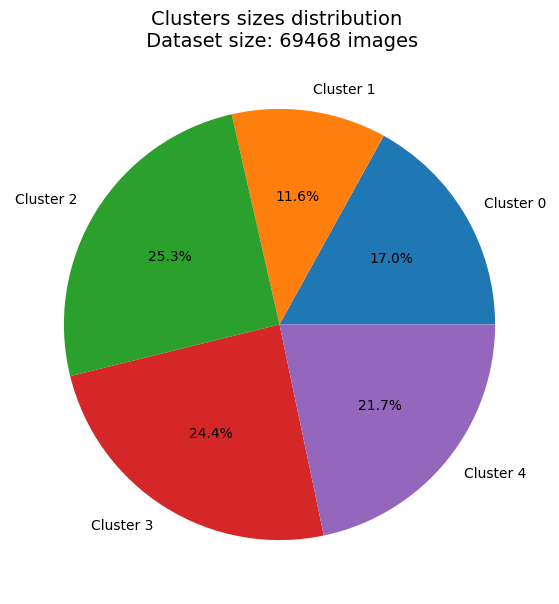

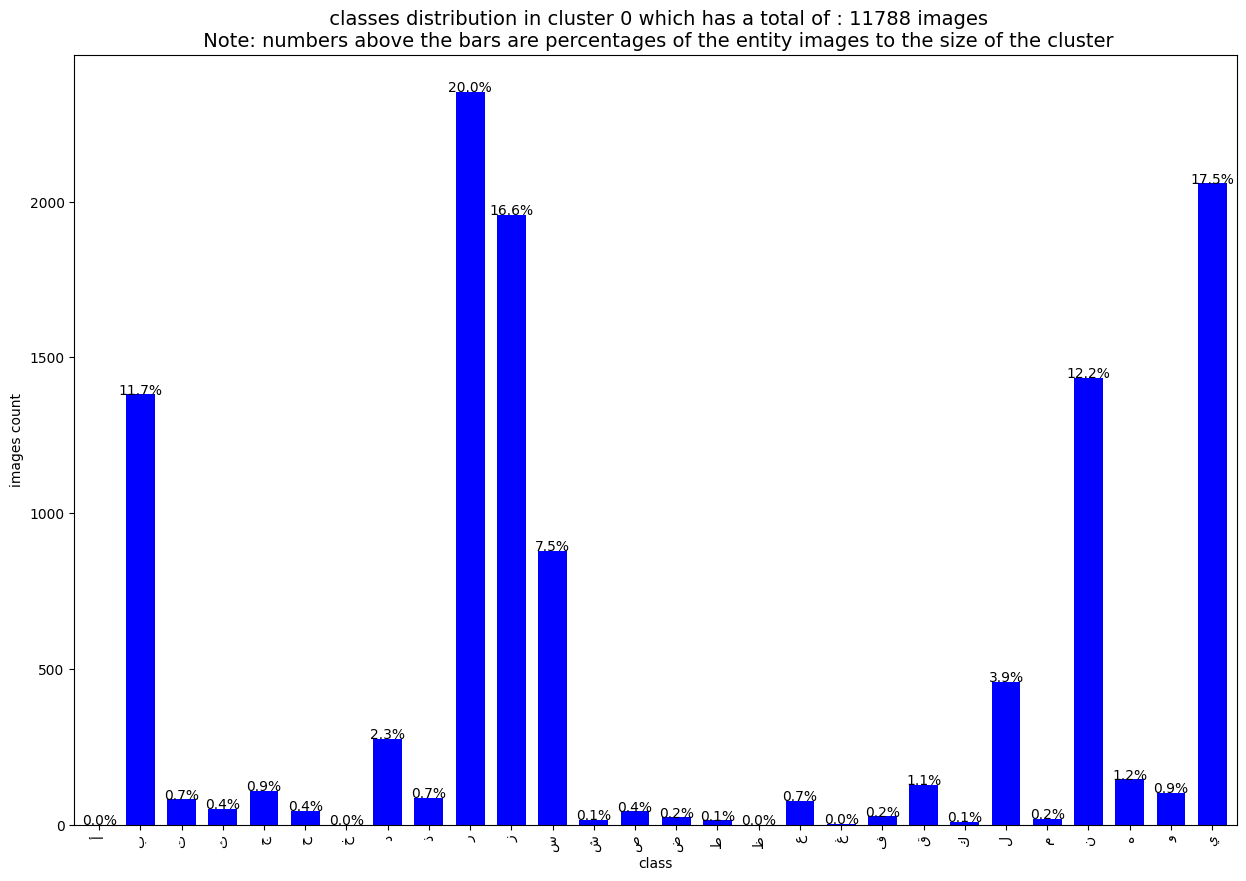

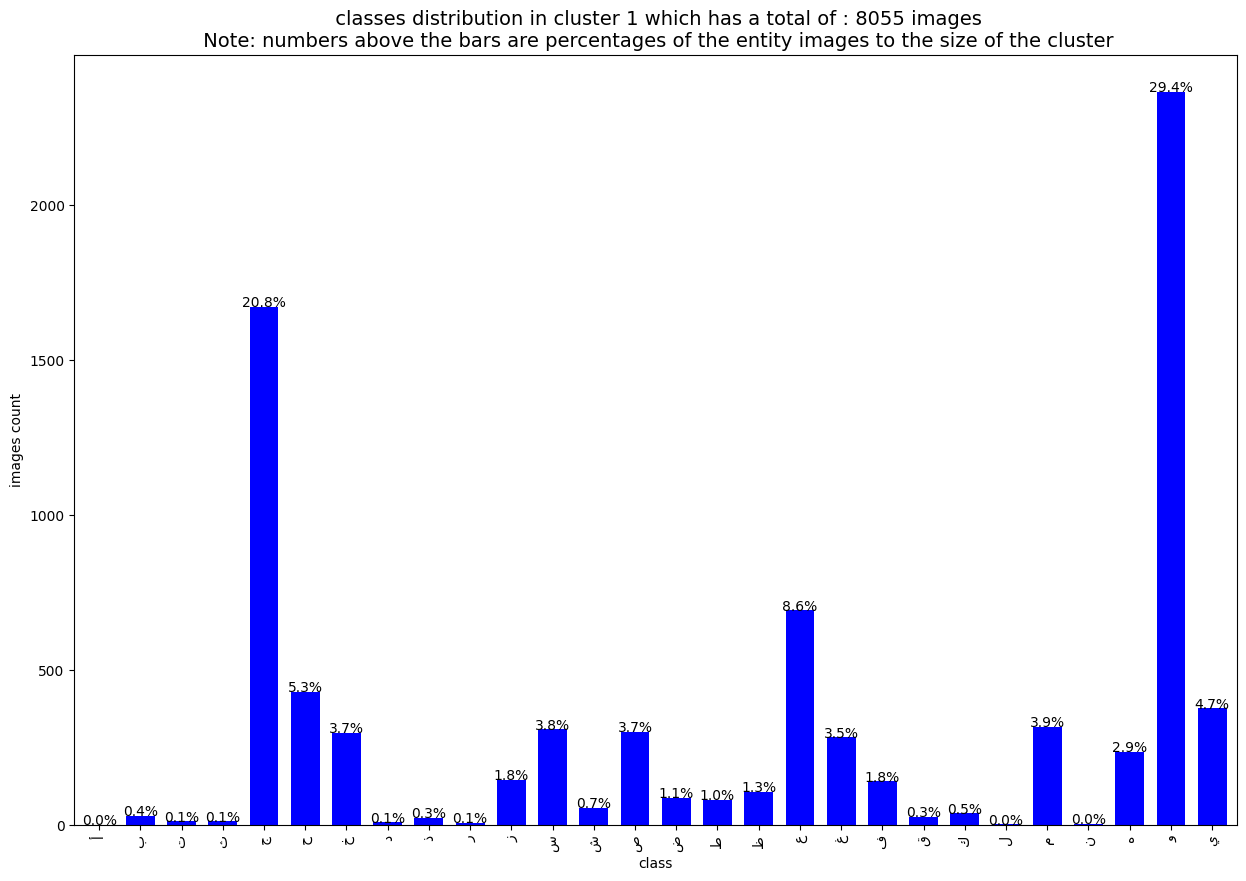

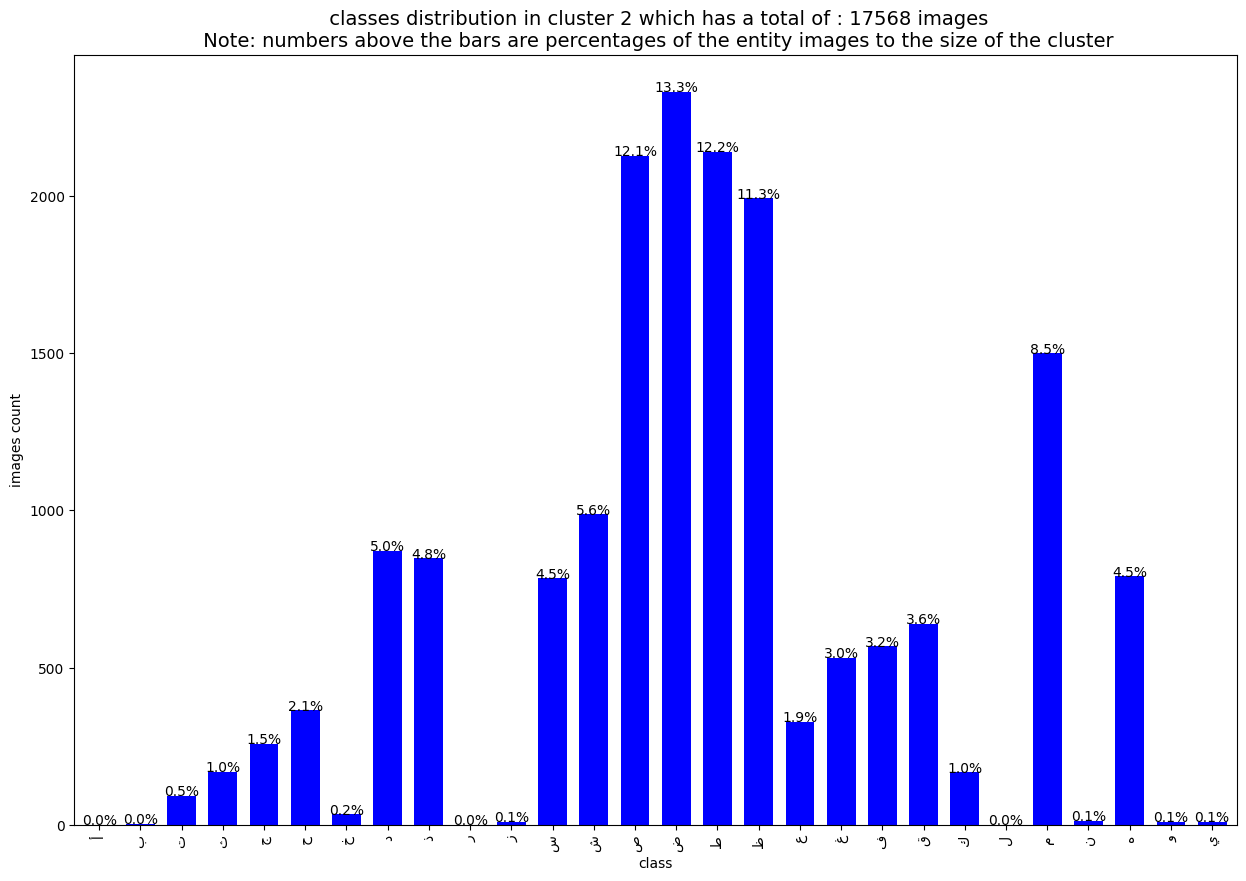

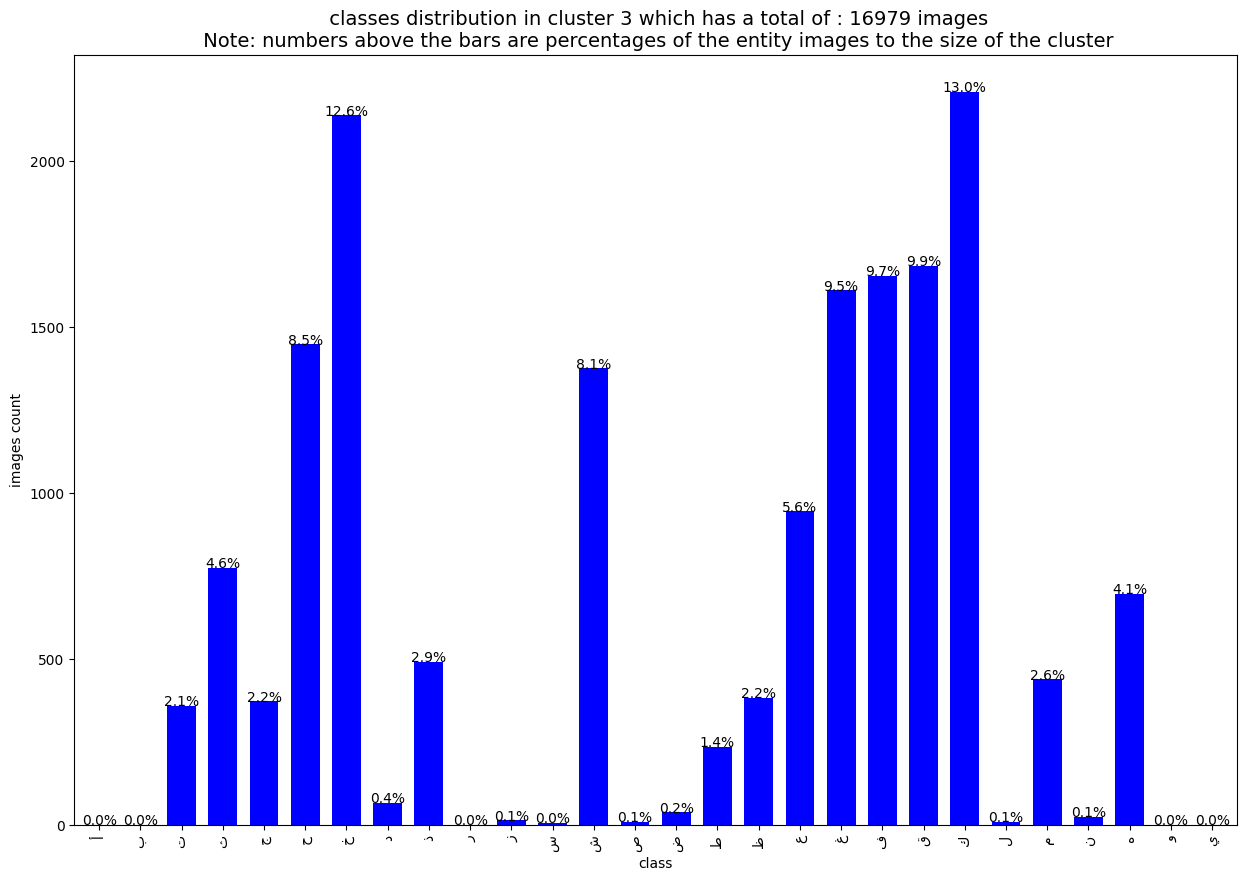

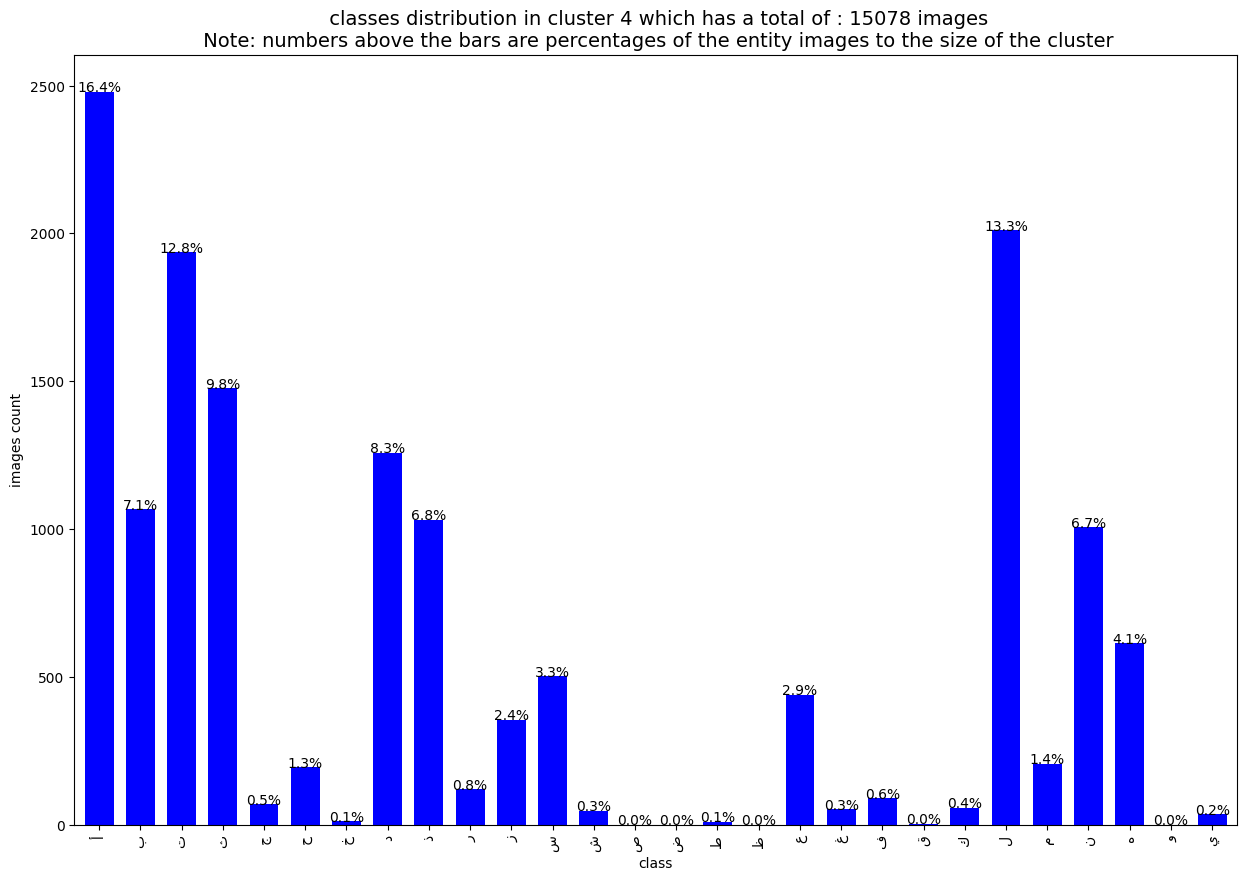

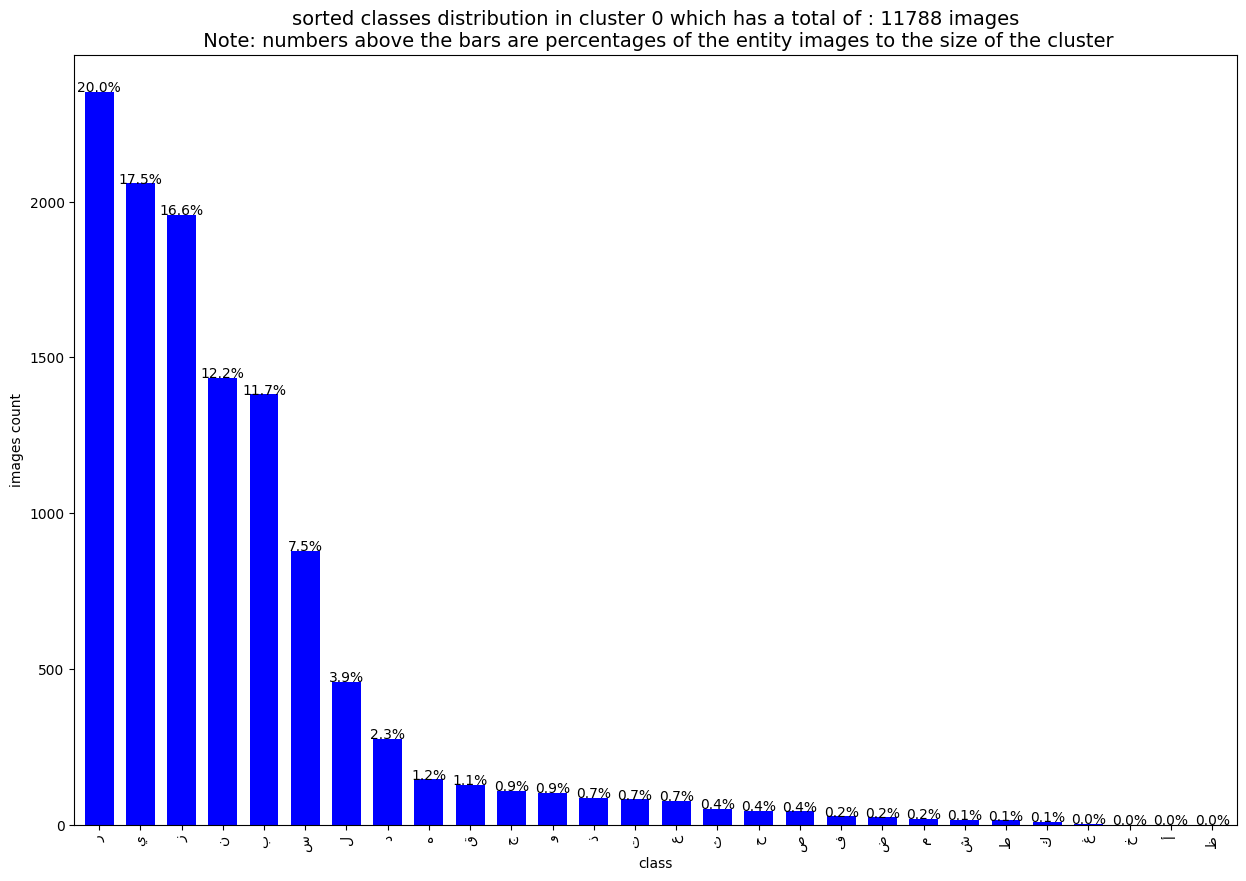

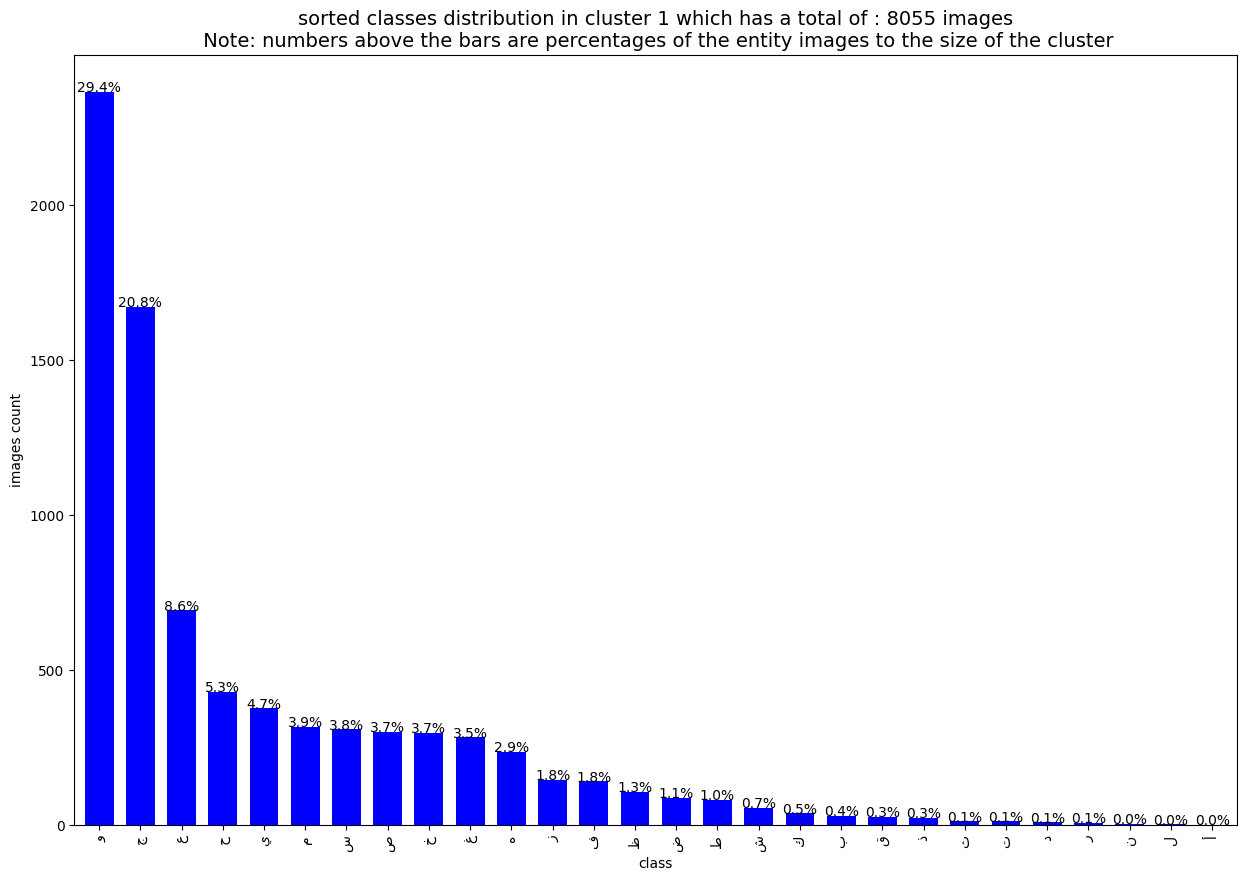

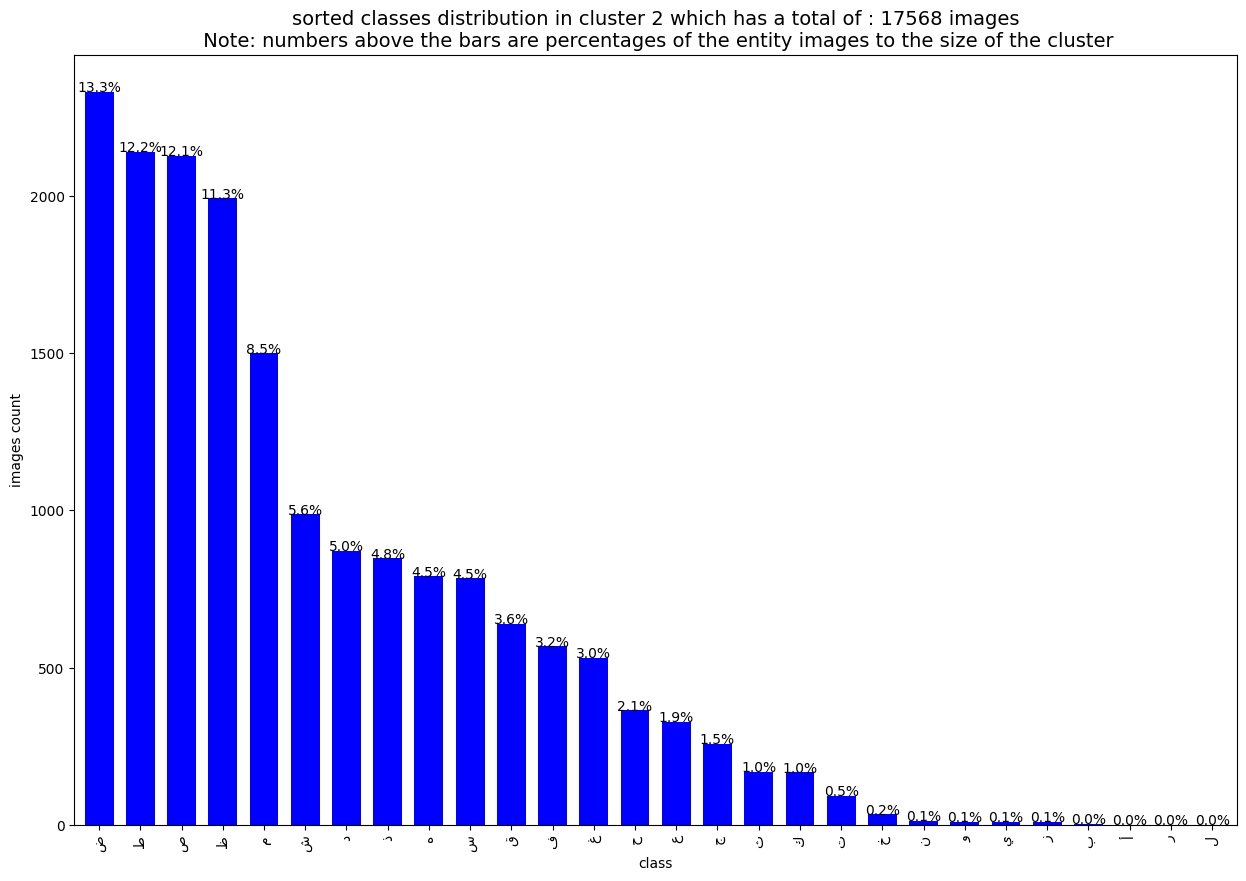

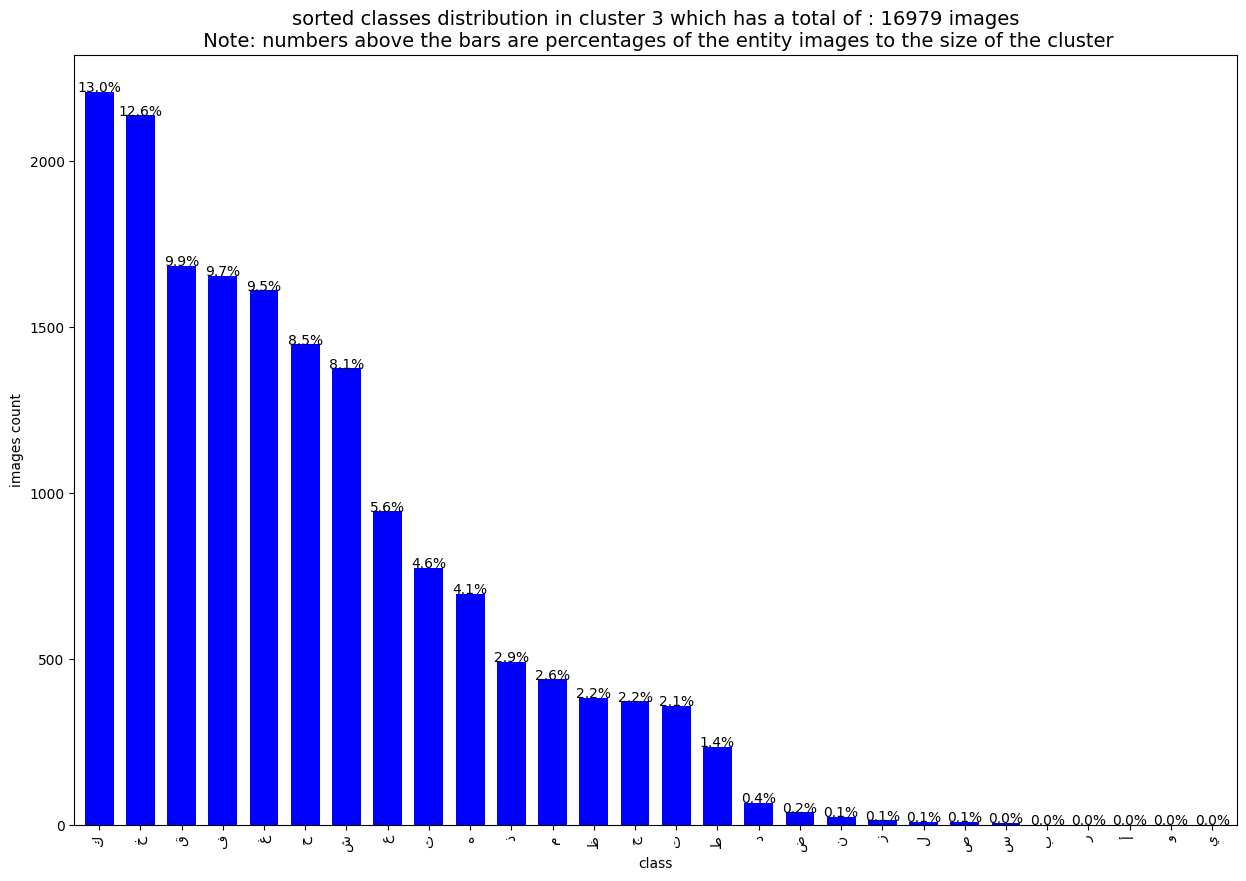

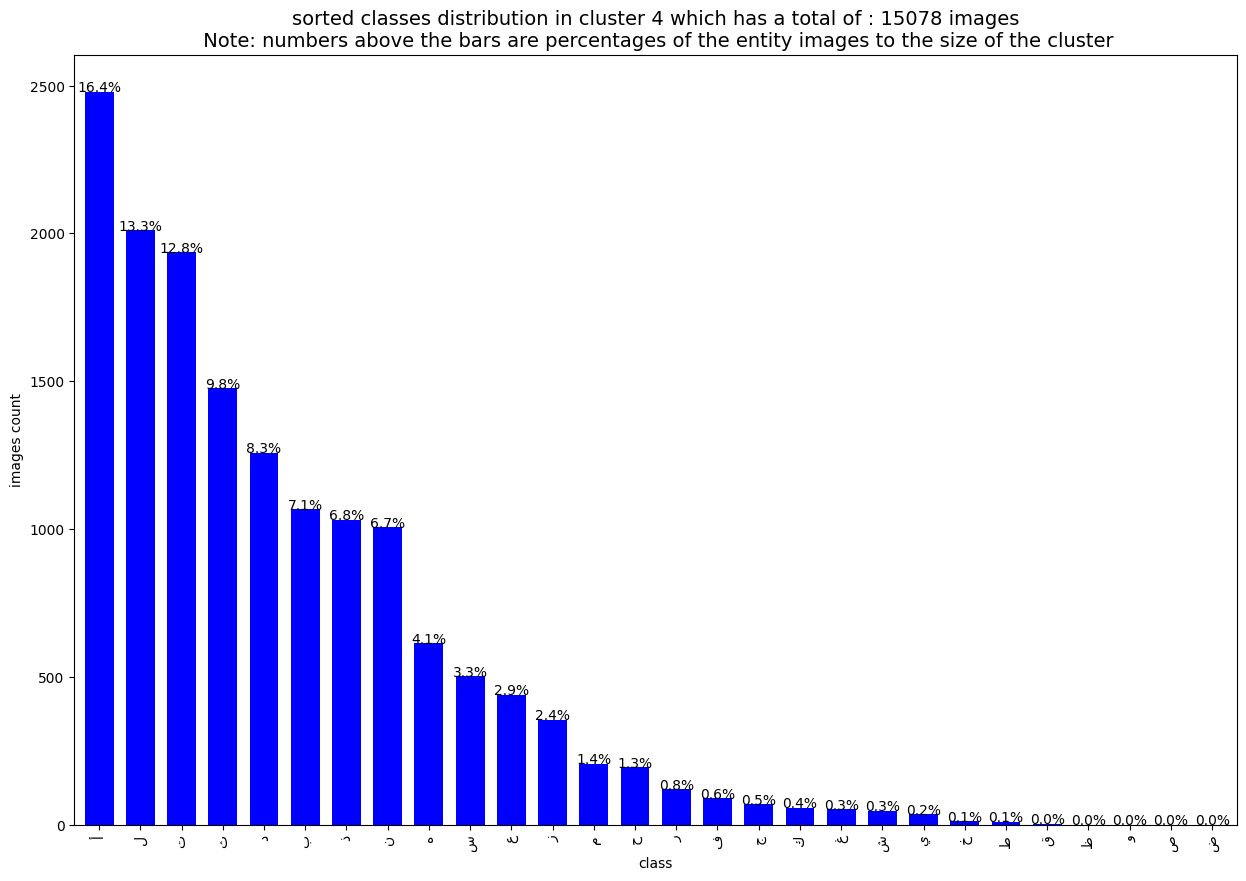


Loading Images in a Dataframe done in : 1 h, 19 m, 27 s


In [9]:
# 1 --------------------------------------------------------- Loading Images in a Dataframe
# region
# @title 1 - Loading Images in a Dataframe { display-mode: "form" }


from matplotlib.style import available


start_time = time.time()

all_entities_names = natsorted(os.listdir(ready_data_path))
print("all entities names:", all_entities_names)
filenames = []
original_data_set_size = 0
feature_extraction_model = VGG16(weights='imagenet', include_top=False)

all_feature_vectors = []

for entity_name in all_entities_names:
    print(f"loading ({entity_name}) images in the dataframe")
    entity_path = os.path.join(ready_data_path, entity_name)
    entity_filenames = [file_name for file_name in os.listdir(entity_path)]
    original_data_set_size += len(entity_filenames)
    random.shuffle(entity_filenames)
    entity_filenames = entity_filenames[:int(len(entity_filenames) * (DATA_PERCENTAGE_TO_USE / 100))]
    filenames.extend([os.path.join(entity_name, file_name) for file_name in entity_filenames])

    # Initialize feature_vectors array for current entity
    feature_vectors = np.empty((len(entity_filenames), 25088))
    
    print(f"extracting features from ({entity_name}) images...")
    trash_printings = io.StringIO()
    with contextlib.redirect_stdout(trash_printings): # just to suppress the output of the following code
        for i, entity_file_name in enumerate(entity_filenames):
            img_path = os.path.join(entity_path, entity_file_name)
            feature_vectors[i] = image_to_feature_vector(img_path, feature_extraction_model)
    all_feature_vectors.append(feature_vectors)

# Combine all feature vectors into one array
all_feature_vectors = np.concatenate(all_feature_vectors)


print_current_ram_usage("after making the flattened_images np array")

print(f"selected data set size = {DATA_PERCENTAGE_TO_USE / 100} * {original_data_set_size} = {len(filenames)}") 
file_labels = [x.split(os.sep)[0] for x in filenames] 
data = pd.DataFrame({"filename": filenames, "label": file_labels})
data = data.iloc[natsorted(data.index.values)] # sort the data frame by the labels using natsort

# clustering part ------------------------------------------------------------

# -------------------- Elbow Method to find the optimal number of clusters
# if ESTIMATE_OPTIMAL_NO_OF_CLUSTERS:
#     print("Elbow Method to find the optimal number of clusters...")
#     wcss = []
#     for i in range(1, 11):  # change the range according to your needs
#         kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#         kmeans.fit(flattened_images)
#         wcss.append(kmeans.inertia_)
#     plt.plot(range(1, 11), wcss)
#     plt.title('Elbow Method')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('WCSS')
#     plt.show()
#     print_current_ram_usage("after Elbow Method to find the optimal number of clusters")
# -------------------------------------
# this model is used to extract features from the images , to cluster them properly

# Perform KMeans clustering
("performing KMeans clustering...")

batch_size = len(all_feature_vectors) // 50
print(f"batch_size = {len(all_feature_vectors)} // 50 = {batch_size}")

# Get the cluster labels for each image
labels = MiniBatchKMeans(n_clusters=CLUSTERS_COUNT, random_state=0, batch_size=batch_size).fit(all_feature_vectors).labels_

delete_from_RAM(["all_feature_vectors"])
data['cluster'] = labels
visualize_clusters(data)
save_clusters_images_paths(data)

calculate_and_print_time(start_time, 'Loading Images in a Dataframe')
# endregion

